# Softmax Regression

Suppose you want to write a program
that will classify handwritten drawing of
digits into their appropriate category: **0**, **1**, **2**, ..., **9**.

You could, think hard about the nature of
digits, try to determine the logic of what
indicates what kind of digit, and write a
program to codify this logic. Or you could take advantage of the **statistics** of the data, e.g. pixel intensity in a 28 x 28 grid as discriminative features of each instance.

<img src="img/02-1.png">

## ML as data-driven programming

**ML approach:** Collect a training set of images with known labels
and feed these into a machine learning algorithm, which, if done well, will automatically produce a "program" that solves this task. The  said program includes a large number of [magic numbers](https://en.wikipedia.org/wiki/Magic_number_(programming)), but it nonetheless performs a sequence of computations to determine the output class.

<img src="img/02-2.png">

## Three ingredients of a ML algorithm

Every machine learning algorithm consists of three different elements:

1. **Hypothesis class** ($\mathcal{H}$). The "program structure", parameterized via a set of
parameters, that describes how we map inputs (e.g. images of digits) to
outputs (e.g. class labels, or probabilities of different class labels). Formally, $\mathcal{H} = \{h_\theta \mid \theta \in \mathbb{R}^d \}$ where $h_\theta(\mathbf{x}) = \hat{y}$ or $\hat{\mathbf{p}}$ for an input $\mathbf{x}.$

2. **Loss function** ($\ell$). A function that specifies how "well" a given **hypothesis** (i.e. a choice of parameters) performs on the task of interest. Thus, we have the **loss** $\mathcal{L}(h_\theta, \mathcal{X}, \mathcal{Y})$ where $\mathcal{X} = (\mathbf{x}_i)_{i=1}^N$ and $\mathcal{Y} = ({y}_i)_{i=1}^N$ are the input and target sequences respectively. The loss is expressed in terms of a pointwise **loss function** $\ell$ such that:
$$\mathcal{L}(h_\theta, \mathcal{X}, \mathcal{Y}) = \sum_{i=1}^N \ell(h_\theta(\mathbf{x}_i), y_i)$$
where $\ell$ outputs nonnegative real numbers and $\ell \to 0$ whenever the predictions are accurate, otherwise $\ell \to \infty$ as the predictions become increasingly worse.

4. **An optimization method.** A procedure for determining a set of parameters
that (approximately) minimize the training loss:
$$\theta^* \approx {\text{argmin}}_{\theta} \; \mathcal{L}(h_\theta, \mathcal{X}, \mathcal{Y}).$$ Note that the training dataset is fixed while we vary the parameters to determine a suitable hypothesis.
The exact procedure for finding the optimal parameters $\theta^*$ depends on an optimization algorithm. For deep learning, this is typically SGD and its variants.

## Multi-class classification

In a multi-class classification setting, we have a **training dataset** $\mathcal{D}$ that consist of input-output pairs
$\mathcal{D} = \mathcal{X} \times \mathcal{Y} = \{(\mathbf{x}_i, y_i) \mid i = 1, \ldots, M \}$ such that $\mathbf{x}_i \in \mathbb{R}^d$ where $d$ is the **input dimensionality** and $y_i \in [1, k] \subset \mathbb{Z}$ where $k$ is the **number of classes**. Here $M = | \mathcal{D} |$ is the size of the dataset.

A **hypothesis function** $h$ in this setting maps inputs $\mathbf{x}$ to $k$-dimensional vectors:
$h \colon \; \mathbb{R}^d \to \mathbb{R}^k.$
The output $h_j(\mathbf{x})$ indicates some measure of "belief" in how much likely the label is to be class $j$. That is, the most likely class for an input $\mathbf{x}$ is predicted as the coordinate $\hat{j} = \text{argmax}_j \; h_j(\mathbf{x})$.

**Example.** For MNIST, $d = 28 \times 28 = 784$, $k = 10$ and $M = 60,000.$

## Linear hypothesis class

A **linear hypothesis function** uses a linear operator (i.e. matrix multiplication) for this transformation:

$$h_\Theta(\mathbf{x}) = \Theta^\top \mathbf{x}$$

for parameters $\Theta \in \mathbb{R}^{d \times k}.$ In practice, we usually write this using matrix-batch notation since we process inputs in parallel as a matrix:

$$h_\Theta(\mathbf{X}) = \mathbf{X} \Theta$$

where 

$$
\begin{equation}
\mathbf{X}=\left[\begin{array}{c}
-\, \mathbf{x}^{(1)\top}- \\
\vdots \\
-\, \mathbf{x}^{(M)\top}-
\end{array}\right] \in \mathbb{R}^{M \times d}
\end{equation}.
$$

That is, the inputs are laid out as row vectors inside the matrix. This allows us to multiply the parameter matrix without transposing:

$$
h_\Theta(\mathbf{X}) =  \underbrace{\mathbf{X}}_{\mathbb{R}^{M \times d}} \; \underbrace{\Theta}_{\mathbb{R}^{d \times k}} \in \mathbb{R}^{M \times k}.
$$

This makes sense, we have $M$ vectors of length $k.$ Note that geometrically each $\theta_j = \Theta_{[:, j]} \in \mathbb{R}^d$ defines a separating hyperplane for class $j \in [k].$ So a linear hypothesis class is able to learn to separate linearly separable data points in $\mathbb{R}^d$ using $k$ separating hyperplanes by assigning a score $s_j = \theta_j^\top \mathbf{x} \in \mathbb{R}.$

## Loss function

The simplest loss is just the **classification error**: 
$$\ell_{\text{err}} = 1 - [\begin{equation}
\operatorname{argmax}_i h_i(\mathbf{x})\equiv y
\end{equation}] \in \{0, 1\}.$$

We typically use this loss function to assess the quality of classifiers. Unfortunately, the error is a bad loss function to use for optimization, because it is not differentiable, i.e. we can smoothly adjust the parameters without seeing a change in $\ell_{\text{err}}$ or that it changes abruptly.



Instead, we look at the probabilities assigned by the model to each class. To do this, we have to convert the class scores to probabilities exponentiating and
normalizing its entries (i.e. making $\sum_j p = 1$ s.t. $p_j \geq 0$). Class scores $h_j(\mathbf{x}) = \theta_j^\top \mathbf{x}$ are exponentiated before normalizing:

$$
p_j = \frac{\exp(h_j(\mathbf{x}))}{\sum_l \exp(h_l(\mathbf{x}))} \eqqcolon \text{Softmax} (h(\mathbf{x}))_j.
$$

Then, the **cross-entropy loss** is given by the negative log of the probability of the true class $y$:

$$
\begin{aligned}
\ell_{\text{ce}}(h(\mathbf{x}), y) 
&= -\log p_y \\
&= \begin{equation}
-h_y(\mathbf{x})+\log \sum_{j=1}^k \exp \left(h_j(\mathbf{x})\right).
\end{equation}
\end{aligned}
$$

**Remark.** Exponentiating means that scores does not scale linearly. In fact, 

$$
p_j = \frac{\exp(\Delta h_j(\mathbf{x}))}{\sum_l \exp(\Delta h_l(\mathbf{x}))}
$$

where $\Delta h_l(\mathbf{x}) = h_l(\mathbf{x}) - \max_{m} h_m(\mathbf{x}).$ This prevents both underflow and overflow with $\log (1 + \sum a_j)$ where $0 < a_j \leq 1$, but also shows that the individual scores scale exponentially with the diff from the largest score. Hence, this transformation is sometimes called soft-*arg*max.

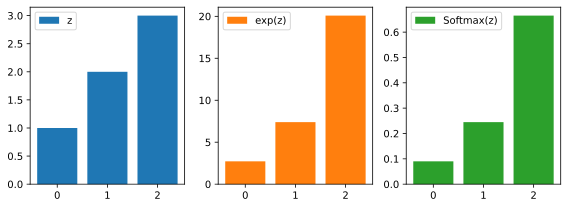

In [51]:
%config InlineBackend.figure_formats = ['svg'] 
import matplotlib.pyplot as plt

z = torch.tensor([1, 2, 3]).float()
fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].bar(range(3), z.numpy(), label="z")
ax[1].bar(range(3), z.exp().numpy(), color="C1", label="exp(z)")
ax[2].bar(range(3), z.exp().numpy() / z.exp().numpy().sum(), color="C2", label="Softmax(z)")
ax[0].legend(); ax[1].legend(); ax[2].legend();
fig.tight_layout()